In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt

## 元データ

In [2]:
origin = pd.read_csv('data/pokemon_data.csv', encoding='utf8')
origin.head()

,No,Japanese,English,German,French,Korean,Simplified Chinese,Traditional Chinese,Generation,Form,...,C,D,S,Ability1,Ability2,Ability3,Type1,Type2,Weight,Evolve Flag
0,1,フシギダネ,Bulbasaur,Bisasam,Bulbizarre,이상해씨,妙蛙种子,妙蛙種子,1,-,...,65,65,45,しんりょく,-,ようりょくそ,くさ,どく,6.9,0
1,2,フシギソウ,Ivysaur,Bisaknosp,Herbizarre,이상해풀,妙蛙草,妙蛙草,1,-,...,80,80,60,しんりょく,-,ようりょくそ,くさ,どく,13.0,0
2,3,フシギバナ,Venusaur,Bisaflor,Florizarre,이상해꽃,妙蛙花,妙蛙花,1,-,...,100,100,80,しんりょく,-,ようりょくそ,くさ,どく,100.0,1
3,3,メガフシギバナ,Venusaur,Bisaflor,Florizarre,이상해꽃,妙蛙花,妙蛙花,6,メガシンカ,...,122,120,80,あついしぼう,-,-,くさ,どく,155.5,0
4,4,ヒトカゲ,Charmander,Glumanda,Salameche,파이리,小火龙,小火龍,1,-,...,60,50,65,もうか,-,サンパワー,ほのお,-,8.5,0


定義はこちらになります。

|列名|詳細|
|-|-|
|No|図鑑番号です。|
|Japanese|日本語名です。|
|English|英語名です。|
|German|ドイツ語名です。|
|French|フランス語名です。|
|Korean|韓国語名です。|
|Simplified Chinese|中国語の簡体字での名前です。|
|Traditional Chinese|中国語の繁体字での名前です。|
|Generation|初登場した世代です。|
|Form|フォルムチェンジ、メガシンカ、ゲンシカイキなどの名前です。|
|H|HPの種族値です。|
|A|物理攻撃の種族値です。|
|B|物理防御の種族値です。|
|C|特殊攻撃の種族値です。|
|D|特殊防御の種族値です。|
|S|すばやさの種族値です。|
|Ability1|特性1です。|
|Ability2|特性2です。|
|Ability3|隠れ(夢)特性です。|
|Type1|1つ目のタイプです。|
|Type2|2つ目のタイプです。|
|Weight|体重です。|
|Evolve Flag|最終進化系である場合1を、そうでない場合0を割り当てています。|

## ではお試しで簡単な利用方法をご紹介しましょう。
まずは、クチートを選択してみます。

In [3]:
origin.loc[origin['No'] == 303]

,No,Japanese,English,German,French,Korean,Simplified Chinese,Traditional Chinese,Generation,Form,...,C,D,S,Ability1,Ability2,Ability3,Type1,Type2,Weight,Evolve Flag
346,303,クチート,Mawile,Flunkifer,Mysdibule,입치트,大嘴娃,大嘴娃,3,-,...,55,55,50,かいりきバサミ,いかく,ちからずく,はがね,フェアリー,11.0,1
347,303,メガクチート,Mawile,Flunkifer,Mysdibule,입치트,大嘴娃,大嘴娃,6,メガシンカ,...,55,95,50,ちからもち,-,-,はがね,フェアリー,23.5,1


うまくできましたね。
それでは、すばやさ種族値のランキングとヒストグラムを出してみましょう。

In [4]:
ranked_by_s = origin.sort_values('S', ascending=False)
ranked_by_s.head()

,No,Japanese,English,German,French,Korean,Simplified Chinese,Traditional Chinese,Generation,Form,...,C,D,S,Ability1,Ability2,Ability3,Type1,Type2,Weight,Evolve Flag
449,386,デオキシス,Deoxys,Deoxys,Deoxys,테오키스,代欧奇希斯,代歐奇希斯,3,スピードフォルム,...,95,90,180,プレッシャー,-,-,エスパー,-,60.8,1
333,291,テッカニン,Ninjask,Ninjask,Ninjask,아이스크,铁面忍者,鐵面忍者,3,-,...,50,50,160,かそく,-,すりぬけ,むし,ひこう,12.0,1
902,795,フェローチェ,Pheromosa,Schabelle,Cancrelove,페로코체,费洛美螂,費洛美螂,7,-,...,137,37,151,ビーストブースト,-,-,むし,かくとう,25.0,1
82,65,メガフーディン,Alakazam,Simsala,Alakazam,후딘,胡地,胡地,6,メガシンカ,...,175,105,150,トレース,-,-,エスパー,-,48.0,1
125,101,マルマイン,Electrode,Lektrobal,Electrode,붐볼,顽皮雷弹,頑皮雷彈,1,-,...,80,80,150,ぼうおん,せいでんき,ゆうばく,でんき,-,66.6,1


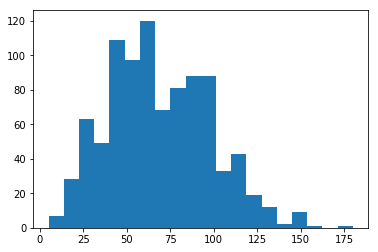

In [5]:
plt.hist(list(origin['S']), bins=20)
plt.show()

３０, 50, 60, 100を超えると凹んでいるのが見て取れると思います。激戦区のちょっと上ということでしょうか。

次は、どの特性を持つポケモンが一番多いのかを出してみましょう。

In [6]:
# フシギダネは、Ability1,2,3ともに「しんりょく」なので、このまま集約すると３とカウントしてしまう。それを防ぐために一旦setに直す
all = origin.apply(lambda x: set([x['Ability1'], x['Ability2'], x['Ability3']]), axis=1)

# ハイフンを取り除きます
abilities = []
for tmp in all.iteritems():
    abilities.extend(list(tmp[1]))
abilities = [i for i in abilities if i != '-']
    
# 各特性の数をカウントします
c = collections.Counter(abilities)
for k, v in sorted(c.items(), key=lambda x: -x[1]): # 降順ソートなので-x[1]
    print(k, v)

がんじょう 41
ふゆう 40
すいすい 39
するどいめ 37
ようりょくそ 35
いかく 32
せいしんりょく 31
プレッシャー 28
ちからずく 26
おみとおし 26
むしのしらせ 25
ものひろい 25
すながくれ 24
ちょすい 24
どんかん 24
しんりょく 23
もうか 23
げきりゅう 23
くいしんぼう 23
シェルアーマー 23
あついしぼう 22
マイペース 22
ぼうじん 22
こんじょう 21
すりぬけ 21
テレパシー 21
にげあし 20
はりきり 20
きんちょうかん 20
うるおいボディ 20
ふみん 20
テクニシャン 19
いしあたま 19
さいせいりょく 19
とうそうしん 18
しめりけ 18
すなのちから 18
リーフガード 18
ひらいしん 17
もらいび 17
かたやぶり 17
そうしょく 17
だっぴ 16
ほのおのからだ 16
くだけるよろい 16
しぜんかいふく 16
せいでんき 15
ゆきがくれ 15
メロメロボディ 15
シンクロ 15
はやおき 15
ぼうおん 15
スナイパー 14
どくのトゲ 14
やるき 14
まけんき 14
アイスボディ 14
てつのこぶし 14
あめうけざら 13
びびり 13
すてみ 13
てんのめぐみ 13
じしんかじょう 13
いたずらごころ 13
はとむね 12
じゅうなん 12
ふくつのこころ 12
アナライズ 12
かるわざ 12
かそく 12
てきおうりょく 11
せいぎのこころ 11
クリアボディ 11
かいりきバサミ 11
きもったま 11
みずのベール 11
ビーストブースト 11
ノーガード 10
マジックガード 10
スキルリンク 10
サンパワー 9
りんぷん 9
いろめがね 9
ふくがん 9
てんねん 9
ほうし 9
どくしゅ 9
カブトアーマー 9
きょううん 9
あまのじゃく 9
ぶきよう 9
フレンドガード 8
かちき 8
じりょく 8
ねんちゃく 8
ゆうばく 8
いやしのこころ 8
はっこう 8
はやあし 8
プラス 8
きけんよち 8
ちどりあし 7
すなかき 7
ゆきふらし 7
あくしゅう 7
かんそうはだ 7
のろわれボディ 7
ちくでん 7
わるいてぐせ 7
ムラっけ 7
すなおこし 7
よびみず 7
スイートベール 7
かたいツ

「がんじょう」持ちのポケモンが一番多いんですね。何気に「すいすい」も多いです。

次は、ポケモンの運動量を計算してみましょう。
質量はポケモンの体重、速度はポケモンのすばやさ種族値として計算してみました。

In [7]:
all = origin.apply(lambda x: list([x['Japanese'] + x['Form'], x['S'] * x['Weight']]), axis=1)
print(sorted(list(all), key=lambda x: -x[1]))

[['メガメタグロスメガシンカ', 103719.0], ['ゲンシグラードンゲンシカイキ', 89973.0], ['グラードン-', 85500.0], ['ギラティナアナザーフォルム', 67500.0], ['ディアルガ-', 61470.0], ['テッカグヤ-', 60993.9], ['ギラティナオリジンフォルム', 58500.0], ['ジガルデパーフェクトフォルム', 51850.0], ['メガレックウザメガシンカ', 45080.0], ['レジギガス-', 42000.0], ['フーパかいほうのすがた', 39200.0], ['ゲンシカイオーガゲンシカイキ', 38700.0], ['メタグロス-', 38500.0], ['アルセウス-', 38400.0], ['アクジキング-', 38218.4], ['コスモウム-', 36996.299999999996], ['ネクロズマ月食のすがた', 35420.0], ['メガオニゴーリメガシンカ', 35020.0], ['パルキア-', 33600.0], ['ヒードラン-', 33110.0], ['バンバドロ-', 32200.0], ['カイオーガ-', 31680.0], ['ゼクロム-', 31050.0], ['キュレム-', 30875.0], ['ブラックキュレム-', 30875.0], ['ホワイトキュレム-', 30875.0], ['レシラム-', 29700.0], ['ネクロズマU', 29670.0], ['ジガルデ-', 28975.0], ['テラキオン-', 28080.0], ['コバルオン-', 27000.0], ['ネクロズマ日食のすがた', 26950.0], ['マッシブーン-', 26354.4], ['メガギャラドスメガシンカ', 24705.0], ['ホエルオー-', 23880.0], ['ルギア-', 23760.0], ['マンムー-', 23280.0], ['ペンドラー-', 22456.0], ['ソルガレオ-', 22310.0], ['メガハガネールメガシンカ', 22200.0], ['ビリジオン-', 21600.0], ['ゼルネアス-', 21285.0], ['オニゴーリ-', 20520.0], [